In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
gold=pd.read_csv("gld_price_data.csv")

In [5]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [8]:
gold.shape

(2290, 6)

In [9]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
gold.corr()["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

In [17]:
gold['EUR/USD'].value_counts()

1.437298    4
1.322401    3
1.285843    3
1.088898    3
1.578507    3
           ..
1.423427    1
1.396902    1
1.404060    1
1.436451    1
1.182033    1
Name: EUR/USD, Length: 2066, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='GLD'>

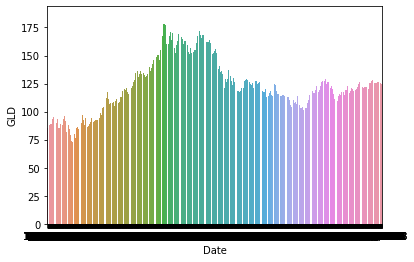

In [19]:
sns.barplot(x=gold['Date'],y=gold['GLD'])

In [20]:
correlation=gold.corr()

<AxesSubplot:>

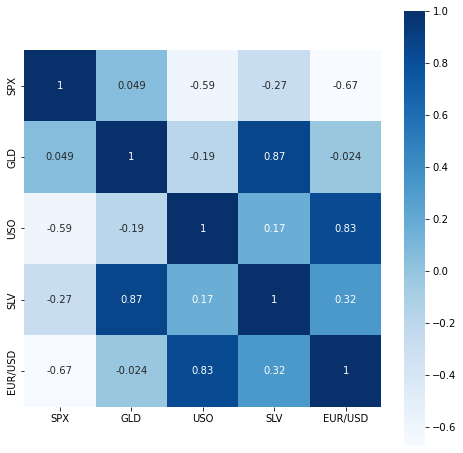

In [24]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,annot=True,cmap='Blues')

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

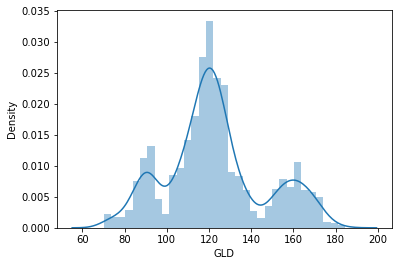

In [25]:
sns.distplot(gold['GLD'])

In [27]:
x=gold.drop(['Date','GLD'],axis=1)
y=gold['GLD']

In [28]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [32]:
regrissior=RandomForestRegressor(n_estimators=100)

In [33]:
regrissior.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
test_data_prediction=regrissior.predict(x_test)

In [36]:
test_data_prediction

array([168.48469932,  82.00609998, 116.05240024, 127.68650082,
       120.84130136, 154.84539779, 150.48919895, 126.10900029,
       117.48489869, 126.28000033, 116.775801  , 171.70250136,
       141.65179892, 167.86879865, 115.22659999, 117.75350034,
       139.33870285, 170.23160115, 159.38490258, 157.26600027,
       155.16620047, 125.20699991, 176.3191    , 157.43630388,
       125.28780031,  93.89429994,  77.4897005 , 121.07120001,
       119.02099917, 167.56389967,  88.24350063, 125.17550036,
        91.08400063, 117.68940048, 120.97349913, 135.71120077,
       115.66450111, 115.2437008 , 148.47099962, 107.2875011 ,
       103.97680233,  87.25219789, 126.56180037, 118.17920004,
       153.62589842, 119.46490009, 108.3986002 , 108.12889826,
        93.31450093, 127.33059717,  74.85450024, 113.62009902,
       121.23619988, 111.18999888, 118.88459919, 120.79359944,
       159.82789988, 168.19410155, 147.12159697,  85.94679871,
        94.51370038,  86.85719858,  90.74519994, 119.15

In [37]:
error_score=metrics.r2_score(y_test,test_data_prediction)

In [38]:
error_score

0.9887632004299622

In [39]:
y_test=list(y_test)

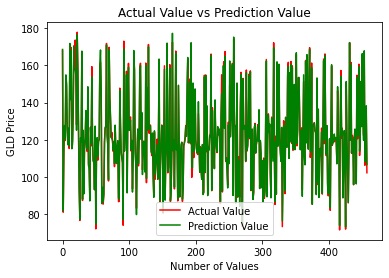

In [42]:
plt.plot(y_test,color='red',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Prediction Value')
plt.title('Actual Value vs Prediction Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()